In [18]:
import os
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [5]:
ROOT = '/mnt/data0/lucy/manosphere/'
SUBS = ROOT + 'data/submissions/'

In [12]:
months = Counter()
for filename in tqdm(os.listdir(SUBS)): 
    if filename == 'bad_jsons': continue
    f = filename.replace('RS_', '').replace('RC_', '').replace('v2_', '').split('.')[0]
    i = 0
    for part in os.listdir(SUBS + filename):
        if not part.startswith('part-'): continue
        with open(SUBS + filename + '/' + part, 'r') as infile: 
            for line in infile: 
                i += 1
    months[f] = i

100%|██████████| 172/172 [00:14<00:00, 12.05it/s]


In [31]:
counts = []
month_names = []
for y in range(2005, 2020): 
    for m in range(1, 13): 
        if len(str(m)) == 1: 
            d = str(y) + '-0' + str(m)
        else:
            d = str(y) + '-' + str(m)
        counts.append(months[d])
        month_names.append(d)
x = [dt.datetime.strptime(d,'%Y-%m').date() for d in month_names][:-4]
counts = counts[:-4]

Text(0.5, 1.0, 'Number of Reddit submissions in manosphere-related subreddits')

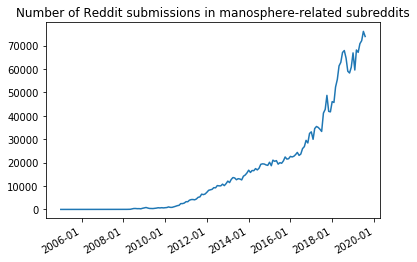

In [33]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(x,counts)
plt.gcf().autofmt_xdate()
plt.title("Number of Reddit submissions in manosphere-related subreddits")